<a href="https://colab.research.google.com/github/esn73/lab_python/blob/master/py05_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning(기계 학습)

* __지도 학습(supervised learning)__: 레이블이 있는 데이터를 모델을 훈련시키는 것.

    * __분류(classificaition)__ : 클래스를 분류.
    * __회귀(regression)__: 숫자 값을 예측.
* __비지도 학습(unsupervised learning)__: 레이블이 없는 데이터로 모델을 훈련 시키는 것.
* __강화 학습(reinforcement learning)__: 보상과 벌칙을 통해서 학습(훈련).

# 문제 정의

fish 데이터 셋에서 농어(Perch)의 무게(Weight)를 예측.
* 농어의 길이(Length)로만 무게(Weight)를 예측.
* 농어의 여러가지 특성들(Length, Diagonal, ...)로 무게(Weight)를 예측

# imports

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor   # KNN 알고리즘을 사용한 예측기
from sklearn.linear_model import LinearRegression   # 선형회귀 알고리즘을 사용한 예측기
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # 회귀 문제에서의 평가 지표

# 데이터 준비

In [19]:
fish_csv = 'https://github.com/JakeOh/202110_itw_lab_python/raw/main/fish.csv'

In [20]:
fish = pd.read_csv(fish_csv)

In [22]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [27]:
# fish 데이터프레임에서 Perch(농어)만 선택
perch = fish[fish['Species'] == 'Perch']
perch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 72 to 127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   56 non-null     object 
 1   Weight    56 non-null     float64
 2   Length    56 non-null     float64
 3   Diagonal  56 non-null     float64
 4   Height    56 non-null     float64
 5   Width     56 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.1+ KB


In [26]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


농어(perch)의 길이(Length)를 알면 무게(Weight)를 예측할 수 있을 까?

* 관심 변수, 종속 변수(label, target) - Wegiht --> 1차원 배열
* 독립 변수, 특성(features) - Length --> (컬럼이 1개인) 2차원 배열


In [36]:
X = perch[['Length']].values # (컬러이 1개인) 2차원 배열로 만들기 위해서
X[:5, :]

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4]])

In [37]:
y = perch['Weight'].values # 1차원 배열
y[:5]

array([ 5.9, 32. , 40. , 51.5, 70. ])

# 훈련/테스트 셋 분리

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [40]:
X_train.shape, X_test.shape # 2차원 배열

((42, 1), (14, 1))

In [42]:
y_train.shape, y_test.shape # 1차원 배열 axis 방향이 한개임

((42,), (14,))

훈련 셋/ 테스트 셋 시각화(Weight ~ Length 산점도)

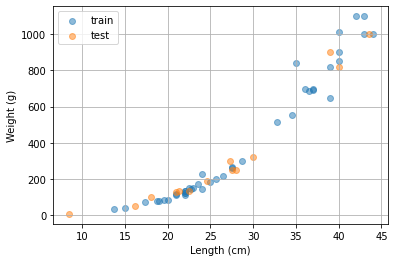

In [46]:
plt.scatter(X_train, y_train, label='train', alpha=0.5)
plt.scatter(X_test, y_test, label='test', alpha=0.5)


plt.grid()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.show()

# KNN Regressor 모델 훈련, 평가

KNN Regressor: 가장 가까운 k개의 이웃들의 레이블(타겟)의 평균값으로 숫자를 예측.

In [50]:
knn_reg = KNeighborsRegressor() # k=5 인 모델 생성

In [52]:
knn_reg.fit(X_train, y_train) # 모델 학습

KNeighborsRegressor()

In [53]:
# 학습된 훈련 셋의 예측값
train_pred = knn_reg.predict(X_train)
train_pred

array([  88.6,  123. ,   79.6,   70.6,  723. ,  193. ,  847. ,  847. ,
       1010. ,  123. ,   95. ,  123. ,  174. ,  248. , 1010. ,  847. ,
        174. ,  113. ,  248. ,  847. ,  659. ,  224. ,  723. ,   60. ,
        140. ,   60. ,  719. ,  694.2,  248. ,  167. ,  847. ,  113. ,
        168. ,  123. , 1010. ,  136. ,   79.6,  719. ,  123. ,  193. ,
        990. ,  659. ])

In [54]:
# 훈련 셋의 실젯값(레이블)
y_train

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

회귀 문제에서의 평가 지표:

* MSE(Mean Squared Errors): 오차들의 제곱의 평균
* RMSE(Root Mean Squared Errors): MSE의 제곱근
* MAE(Mean Absolute Errors): 오차들의 절대값의 평균

In [55]:
# 훈련 셋의 MSE, RMSE
train_mse = mean_squared_error(y_train, train_pred)
train_rmse = np.sqrt(train_mse)
train_rmse

60.96323638453089

In [56]:
# 훈련 셋의  MAE
mean_absolute_error(y_train, train_pred)

35.76190476190476

In [ ]:
# 테스트 셋의 예측값

# 테스트 셋의 RMSE